In [4]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

0.35714285714285715

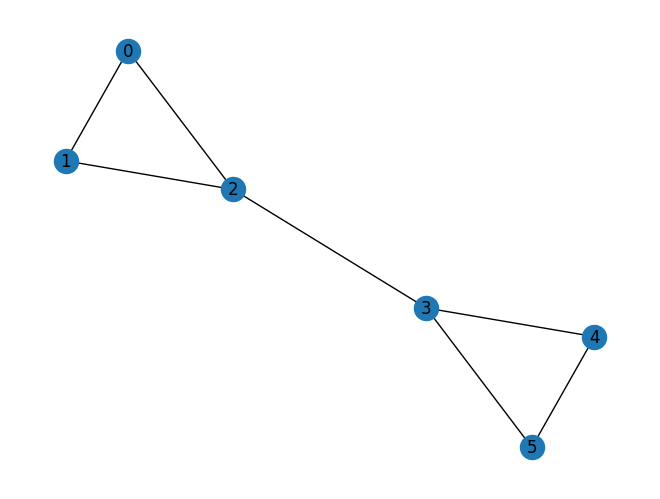

In [2]:
G = nx.barbell_graph(3, 0)
nx.draw(G, with_labels = True)
nx.community.modularity(G, nx.community.label_propagation_communities(G))

Changing the Spearman p-values based on modularity won't affect the differential networks, since we only look at the Spearman correlation coefficients for the permutations. I think it only changes the network visualisation step, as well as the visualisation for the integrated stage.

### Testing modularity for networks with all samples included:

In [5]:
proteomic = nx.read_gml("Cytoscape/proteomic_prefiltered.gml")
metabolomic = nx.read_gml("Cytoscape/metabolomic_prefiltered.gml")

In [ ]:
proteomic = nx.read_gml("Cytoscape/proteomic_prefiltered_commoncases.gml")
metabolomic = nx.read_gml("Cytoscape/metabolomic_prefiltered_commoncases.gml")

In [ ]:
metabolomic.edges(data=True)

### Testing modularity on fully connected graph

In [115]:
#https://sites.google.com/view/paztronomer/blog/basic/python-colors
#goes up to 15 colours
color_scheme = ["skyblue","orange","green","purple","midnightblue","red","pink","yellow","brown","magenta","cyan","salmon","lime","orchid","khaki"]

def supply_colours (network_copy,clusters):
    color_map = []
    for node in network_copy:
        for index in range(len(clusters)):
            try:
                if node in clusters[index]:
                    color_map.append(color_scheme[index])
            except IndexError:
                    color_map.append("grey")   #colours the first fifteen colours, after that colours the rest grey
    return(color_map)

In [57]:
G = proteomic.copy()

#Removing edges with high overlap:
#edges_to_remove = [(u,v) for u,v,e in G.edges(data=True) if e['Overlap_coef'] >= 0.5]
#G.remove_edges_from(edges_to_remove)

#len(edges_to_remove)

In [106]:
clusters = nx.community.louvain_communities(G,weight='Squared_corr',seed=100,resolution=1.05)
print(len(clusters))

30


[{'R-HSA-110362',
  'R-HSA-110373',
  'R-HSA-1566948',
  'R-HSA-170834',
  'R-HSA-2129379',
  'R-HSA-2173788',
  'R-HSA-2173789',
  'R-HSA-73884',
  'R-HSA-73933'},
 {'R-HSA-109704',
  'R-HSA-112399',
  'R-HSA-1226099',
  'R-HSA-1839122',
  'R-HSA-1839124',
  'R-HSA-1839126',
  'R-HSA-1839130',
  'R-HSA-190236',
  'R-HSA-190239',
  'R-HSA-190241',
  'R-HSA-190242',
  'R-HSA-190322',
  'R-HSA-190372',
  'R-HSA-190373',
  'R-HSA-190375',
  'R-HSA-2033514',
  'R-HSA-2033519',
  'R-HSA-2404192',
  'R-HSA-2428924',
  'R-HSA-2428928',
  'R-HSA-5654219',
  'R-HSA-5654221',
  'R-HSA-5654227',
  'R-HSA-5654228',
  'R-HSA-5654687',
  'R-HSA-5654688',
  'R-HSA-5654689',
  'R-HSA-5654693',
  'R-HSA-5654695',
  'R-HSA-5654696',
  'R-HSA-5654699',
  'R-HSA-5654700',
  'R-HSA-5654704',
  'R-HSA-5654706',
  'R-HSA-5654708',
  'R-HSA-5654710',
  'R-HSA-5654712',
  'R-HSA-5654716',
  'R-HSA-5654719',
  'R-HSA-5654720',
  'R-HSA-5654726',
  'R-HSA-5654727',
  'R-HSA-5654732',
  'R-HSA-5654733',
  'R-HSA-

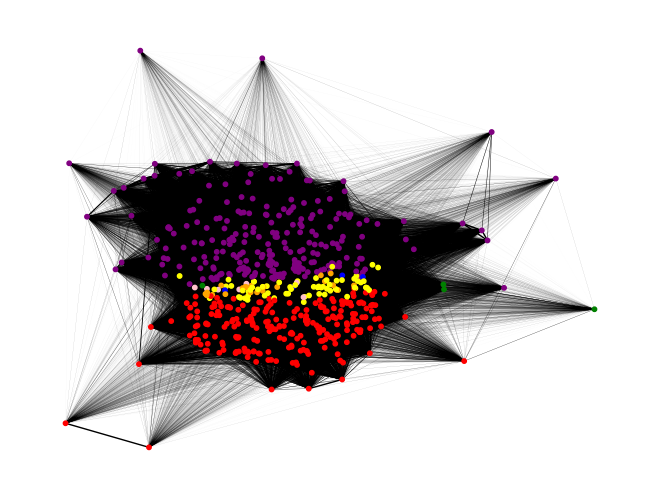

In [66]:
color_map = supply_colours(G,clusters)
squared_corr = [i['Squared_corr'] for i in dict(G.edges).values()] #Sara's code, used to vary edge weight

nx.draw(G, node_size = 10,node_color=color_map,pos=nx.spring_layout(G,weight="Squared_corr",seed=100), with_labels=False,width= squared_corr)  #,edge_color=squared_corr,edge_cmap=plt.cm.Blues

In [67]:
#Does not work with a fully connected graph...
nx.community.modularity(G,communities = clusters)

#...unless you supply the weights
nx.community.modularity(G, communities = clusters,weight="Squared_corr")
                        

0.09683264658300912

### Filtering by Spearman p-value

Before I was using nx.community.label_propagation_communities but it doesn't give the options to provide weights so I switched to Louvain instead

['R-HSA-422085']
5
134925


0.10602593081410722

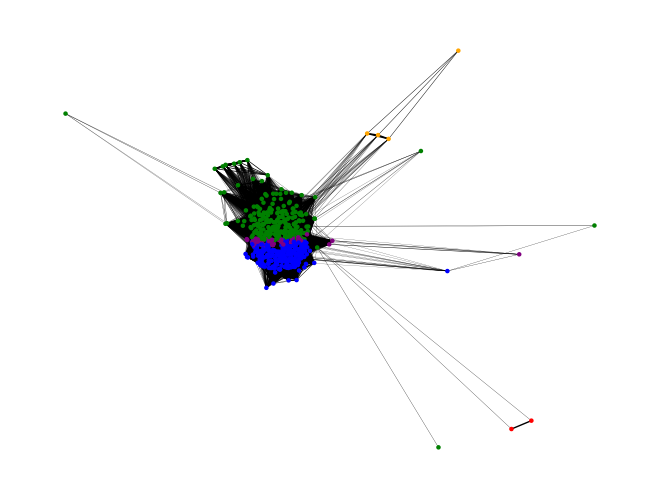

In [7]:
#Example code: Testing modularity 

G = proteomic.copy()
edges_to_remove = [(u,v) for u,v,e in G.edges(data=True) if e['Spearman_pval'] >= 0.005]
G.remove_edges_from(edges_to_remove)

nodes_to_remove = list(nx.isolates(G))
print(nodes_to_remove)
G.remove_nodes_from(nodes_to_remove)

#nx.community.modularity(G, nx.community.label_propagation_communities(G))
clusters = nx.community.louvain_communities(G,weight='Squared_corr',seed=100,resolution=1)
print(len(clusters))

color_map = supply_colours(G,clusters)
squared_corr = [i['Squared_corr'] for i in dict(G.edges).values()] #Sara's code



nx.draw(G, node_size = 5,node_color=color_map,pos=nx.spring_layout(G,weight="Squared_corr",seed=100), with_labels=False,width= squared_corr)
print(G.number_of_edges())

nx.community.modularity(G, communities = clusters,weight="Squared_corr")

In [8]:
def modularity_test(omics_type,val):
    G =  omics_type.copy()
    edges_to_remove = [(u,v) for u,v,e in G.edges(data=True) if e['Spearman_pval'] >= val]
    G.remove_edges_from(edges_to_remove)
    #print(len(edges_to_remove))

    edges_left = G.number_of_edges()

    clusters = nx.community.louvain_communities(G,weight='Squared_corr',seed=100,resolution=1)
    num_clusters = len(clusters)

    modularity = round(nx.community.modularity(G, communities = clusters,weight="Squared_corr"),2)

    return (modularity,edges_left,num_clusters)

In [30]:
print(modularity_test(metabolomic,0.005))
print(modularity_test(proteomic,0.005))

(0.48478542661807844, 3205, 7)
(0.10602593081410452, 134925, 6)


In [16]:
x = np.logspace(-100,0, num=25, base=10)  
print(x)

for val in x:
    print(val)
    print(modularity_test(metabolomic,val))

[1.00000000e-100 1.46779927e-096 2.15443469e-092 3.16227766e-088
 4.64158883e-084 6.81292069e-080 1.00000000e-075 1.46779927e-071
 2.15443469e-067 3.16227766e-063 4.64158883e-059 6.81292069e-055
 1.00000000e-050 1.46779927e-046 2.15443469e-042 3.16227766e-038
 4.64158883e-034 6.81292069e-030 1.00000000e-025 1.46779927e-021
 2.15443469e-017 3.16227766e-013 4.64158883e-009 6.81292069e-005
 1.00000000e+000]
1e-100
(0.57, 330, 69)
1.4677992676220856e-96
(0.58, 364, 67)
2.1544346900318603e-92
(0.61, 393, 63)
3.162277660168379e-88
(0.59, 429, 61)
4.641588833612829e-84
(0.59, 435, 61)
6.812920690579762e-80
(0.6, 457, 60)
1e-75
(0.49, 540, 59)
1.4677992676220855e-71
(0.47, 570, 58)
2.154434690031931e-67
(0.47, 584, 56)
3.1622776601683793e-63
(0.48, 630, 49)
4.64158883361283e-59
(0.43, 754, 47)
6.81292069057965e-55
(0.39, 875, 45)
1e-50
(0.41, 937, 41)
1.4677992676220856e-46
(0.42, 973, 38)
2.1544346900318954e-42
(0.44, 1019, 35)
3.1622776601684313e-38
(0.45, 1090, 31)
4.6415888336128295e-34
(0

In [ ]:
modularity_test(metabolomic,0.005)   #0.0062

All samples: <br>
When filtering at p-val < 0.005 for metabolomic data, modularity is 0.0062, proteomic data reaches this value at roughly p_val < 3.79 e-44 

Common cases (128 cases): <br>
When filtering at p-val < 0.005 for metabolomic data, modularity is 0.182, proteomic data reaches this value at roughly p_val < 6.95 e-24

### Scatterplot for omics networks with whole dataset (samples unfiltered regardless of lack of overlap)

In [9]:
x = np.logspace(-100, 0, num=50) 
proteomic_modularity = []
proteomic_edge = []

metabolomic_modularity = []
metabolomic_edge = []

for val in x:
    proteomic_modularity.append(modularity_test(proteomic,val)[0])
    proteomic_edge.append(modularity_test(proteomic,val)[1])

    metabolomic_modularity.append(modularity_test(metabolomic,val)[0])
    metabolomic_edge.append(modularity_test(metabolomic,val)[1])


In [10]:
log_x = -np.log10(x)

In [11]:

pval_df = pd.DataFrame({'proteomic' : proteomic_modularity, 'metabolomic': metabolomic_modularity})
pval_df.index = log_x
pval_df_long = pval_df.stack().reset_index()
pval_df_long = pval_df_long.rename(columns={'level_0': 'Spearman log p-value', 'level_1': 'omics type', 0 : 'modularity'})


pval_df_long

,Spearman log p-value,omics type,modularity
0,100.000000,proteomic,0.70
1,100.000000,metabolomic,0.57
2,97.959184,proteomic,0.70
3,97.959184,metabolomic,0.58
4,95.918367,proteomic,0.71
...,...,...,...
95,4.081633,metabolomic,0.49
96,2.040816,proteomic,0.11
97,2.040816,metabolomic,0.48
98,-0.000000,proteomic,0.10


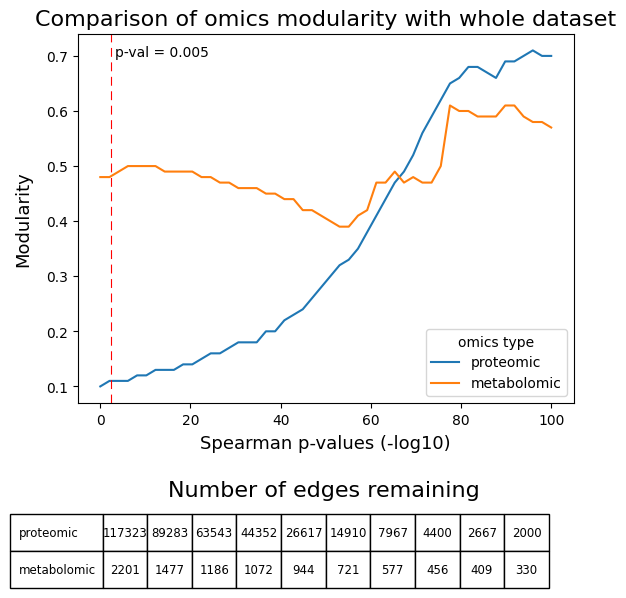

In [74]:
pro_list = list(proteomic_edge[::5])
pro_list.reverse()

met_list = list(metabolomic_edge[::5])
met_list.reverse()


#Create labels for the rows and columns as tuples
rowLabels = ['proteomic', 'metabolomic']
table_data = [pro_list,met_list]

sns.lineplot(pval_df_long,x = "Spearman log p-value", y = "modularity",  hue = "omics type")      

plt.title('Comparison of omics modularity with whole dataset',fontsize=16)
#plt.title('Comparison of omics modularity for common cases',fontsize=16)
plt.xlabel("Spearman p-values (-log10)",fontsize=13, labelpad=5)
plt.ylabel("Modularity",fontsize=13, labelpad=10) 

plt.axvline(x=-np.log10(0.005), color='red', linewidth=0.8, linestyle='--', dashes=(8, 5))
plt.text(3.2, 0.7, "p-val = 0.005",fontsize=10)

#Approximate p-value where the two lines cross
#plt.axvline(x=-np.log10(0.28e-25), color='black', linewidth=0.5, linestyle='--', dashes=(8, 5))
#plt.text(21, 0.65, "p-val = 0.28e-25",fontsize=10)


plt.text(15, -0.1, "Number of edges remaining",fontsize=16)

#Show the table underneath the figure
table = plt.table(cellText=table_data,
                  rowLabels=rowLabels,
                  loc='bottom',
                  bbox=[0.05, -0.5, 0.9, 0.2], #specify where 
                  cellLoc = "center")

table.auto_set_font_size(False)
table.set_fontsize(8.5)

#plt.savefig('Figures/modularity_all.png' ,dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')
#plt.savefig('Figures/modularity_commoncases.png' ,dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')


### Visualising networks and Louvain communities


['R-HSA-156584', 'R-HSA-189200', 'R-HSA-196071', 'R-HSA-2142753', 'R-HSA-351202', 'R-HSA-381753', 'R-HSA-418555', 'R-HSA-418594', 'R-HSA-420499', 'R-HSA-425393', 'R-HSA-549127', 'R-HSA-549132', 'R-HSA-5663205', 'R-HSA-597592', 'R-HSA-6798163', 'R-HSA-70635', 'R-HSA-71288', 'R-HSA-71387', 'R-HSA-75105', 'R-HSA-879518', 'R-HSA-964975', 'R-HSA-9753281']
19
942


0.40863691624652604

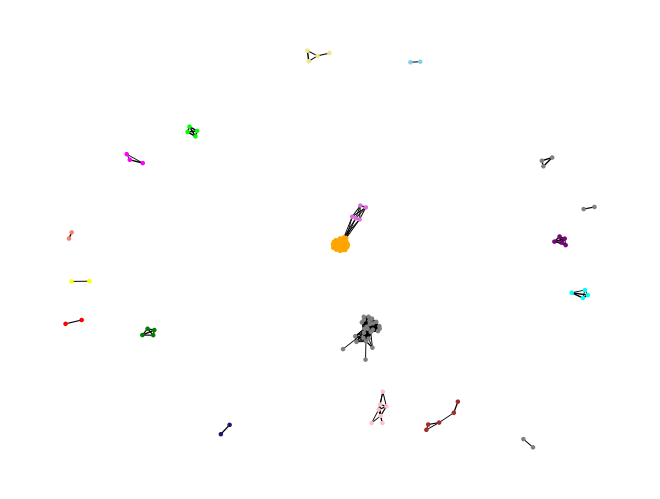

In [119]:
#plt.figure(figsize=(30,30))

G = metabolomic.copy()
edges_to_remove = [(u,v) for u,v,e in G.edges(data=True) if e['Spearman_pval'] >= 5e-50]
G.remove_edges_from(edges_to_remove)

nodes_to_remove = list(nx.isolates(G))
print(nodes_to_remove)
G.remove_nodes_from(nodes_to_remove)

#nx.community.modularity(G, nx.community.label_propagation_communities(G))
clusters = nx.community.louvain_communities(G,weight='Squared_corr',seed=100,resolution=1)
print(len(clusters))

color_map = supply_colours(G,clusters)
squared_corr = [i['Squared_corr'] for i in dict(G.edges).values()] #Sara's code



nx.draw(G, node_size = 5,node_color=color_map,pos=nx.spring_layout(G,weight="Squared_corr",seed=100), with_labels=False,width= squared_corr)
print(G.number_of_edges())

nx.community.modularity(G, communities = clusters,weight="Squared_corr")

### Filtering by overlap coefficient

In [ ]:
def modularity_test(omics_type,val):
    network_copy =  omics_type.copy()
    edges_to_remove = [(u,v) for u,v,e in omics_type.edges(data=True) if (e['Overlap_coef'] >= val)]
    network_copy.remove_edges_from(edges_to_remove)
    print(len(edges_to_remove))
    return (nx.community.modularity(network_copy, nx.community.label_propagation_communities(network_copy)))

In [ ]:
metabolomic.edges(data=True)


In [ ]:
modularity_test(metabolomic,0.1)

In [ ]:
modularity_test(proteomic,0.1)

Modularity remains at zero for both omics networks even when filtering out edges of overlap coefficient > 0.1 (not sure why, I guess because nearly values are at zero). This is true for both the networks with all samples, and the ones with the common samples only (since the overlap coefficient doesn't change).

In [ ]:
proteomic = nx.read_gml("Cytoscape/proteomic_prefiltered.gml")